# <b><span style='color:#F1A424'>AutoDataPrep - Binary Classification - Titanic Survival- Deploy Data</span> </b> 

### Disclaimer
The sample code (“Sample Code”) provided is not covered by any Teradata agreements. Please be aware that Teradata has no control over the model responses to such sample code and such response may vary. The use of the model by Teradata is strictly for demonstration purposes and does not constitute any form of certification or endorsement. The sample code is provided “AS IS” and any express or implied warranties, including the implied warranties of merchantability and fitness for a particular purpose, are disclaimed. In no event shall Teradata be liable for any direct, indirect, incidental, special, exemplary, or consequential damages (including, but not limited to, procurement of substitute goods or services; loss of use, data, or profits; or business interruption) sustained by you or a third party, however caused and on any theory of liability, whether in contract, strict liability, or tort arising in any way out of the use of this sample code, even if advised of the possibility of such damage.

## <b> Problem overview - Binary Classification </b>


The Titanic dataset is a well-known dataset in the field of machine learning and data science. It contains information about passengers aboard the RMS Titanic, including whether they survived or not. The dataset is often used for predictive modeling and classification tasks. Here are some key details about the Titanic dataset:

**Features**:

- `PassengerId`: Unique identifier for each passenger.
- `Pclass`: Ticket class (1st, 2nd, or 3rd).
- `Name`: Passenger's name.
- `Sex`: Passenger's gender (male or female).
- `Age`: Passenger's age.
- `SibSp`: Number of siblings or spouses aboard.
- `Parch`: Number of parents or children aboard.
- `Ticket`: Ticket number.
- `Fare`: Fare paid for the ticket.
- `Cabin`: Cabin number.
- `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Target Variable**:

- `Survived`: Binary variable indicating whether the passenger survived (1) or not (0).
        
**Objective**:

The main objective is typically to build a predictive model that can accurately predict whether a passenger survived based on the available features.

**Challenges**:

- Missing data in the columns such as `Age`, `Cabin`, and `Embarked`.
- Exploring feature engineering techniques to improve model performance.(`Feature exploration and engineering`)
- Understanding passenger demographics and characteristics that influenced survival.(`Model training`)

**Usecase**:

- Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. 
- It will perform `feature exploration`, `feature engineering`, `data preparation`, `model training` and `model evaluation` on dataset in auto run and at end we will get `leaderboard` containined different models along with their performance. 
- Model will also have `rank` associated with them which indicates which is `best performing model` for given data followed by other models.

In [1]:
# Importing AutoDataPrep from teradataml
from teradataml import AutoDataPrep

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
load_example_data("teradataml", "titanic")

In [5]:
titanic = DataFrame.from_table("titanic")

In [6]:
titanic

passenger,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22,0,0,STON/O 2. 3101275,7.125,None,S
101,0,3,"Petranec, Miss. Matilda",female,28,0,0,349245,7.8958,None,S
570,1,3,"Jonsson, Mr. Carl",male,32,0,0,350417,7.8542,None,S
835,0,3,"Allum, Mr. Owen George",male,18,0,0,2223,8.3,None,S
692,1,3,"Karun, Miss. Manca",female,4,0,1,349256,13.4167,None,C
284,1,3,"Dorking, Mr. Edward Arthur",male,19,0,0,A/5. 10482,8.05,None,S
427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28,1,0,2003,26.0,None,S
305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,None,0,0,A/5 2466,8.05,None,S
530,0,2,"Hocking, Mr. Richard George",male,23,2,1,29104,11.5,None,S
265,0,3,"Henry, Miss. Delia",female,None,0,0,382649,7.75,None,Q


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoDataPrep </b>

In [7]:
adp = AutoDataPrep(task_type="Classification", verbose=2)
adp.fit(titanic, titanic.survived)

embarked_0,sex_1,sex_0,parch,survived,embarked_2,embarked_1,automl_id,passenger,pclass,age,sibsp,fare
1,0,1,0,1,0,0,12,0.3651685393258427,0.0,0.6470588235294118,0.0,0.22807017543859648
0,1,0,0,0,1,0,11,0.6629213483146067,1.0,0.6274509803921569,0.0,0.125
0,0,1,0,1,1,0,19,0.9606741573033708,1.0,0.29411764705882354,0.0,0.16403508771929823
0,1,0,0,0,1,0,6,0.8235955056179776,0.5,0.39215686274509803,0.0,0.22807017543859648
0,0,1,0,1,1,0,14,0.18089887640449437,0.5,0.7254901960784313,0.0,0.27631578947368424
0,0,1,0,0,0,1,5,0.2966292134831461,1.0,0.5098039215686274,0.0,0.13596491228070176
0,1,0,0,0,1,0,9,0.5943820224719101,0.5,0.39215686274509803,1.0,0.20175438596491227
0,1,0,0,0,1,0,13,0.27303370786516856,1.0,0.37254901960784315,0.0,0.125
1,0,1,0,1,0,0,10,0.043820224719101124,1.0,0.21568627450980393,0.5,0.19722280701754386
0,1,0,0,0,1,0,7,0.13595505617977527,1.0,0.5098039215686274,0.0,0.14122807017543862


2026-01-21 11:20:56,847 | INFO     | Total time taken by feature scaling: 20.25 sec       
2026-01-21 11:20:56,853 | INFO     | Dimension Reduction using pca ...                    
2026-01-21 11:21:00,566 | INFO     | PCA columns:                                         
['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5']                                    
2026-01-21 11:21:00,566 | INFO     | Total time taken by PCA: 3.71 sec                    


## <b><span style='color:#F1A424'>| 3.</span> Get Prepared data from AutoDataPrep </b>

In [8]:
data = adp.get_data()

In [9]:
data

{'rfe_train':    r_sex_1  r_sex_0  survived  automl_id  r_embarked_2  r_embarked_0  r_passenger     r_age  r_sibsp  r_pclass    r_fare
 0        1        0         0          6             1             0     0.823596  0.392157      0.0       0.5  0.228070
 1        1        0         0          8             0             1     0.067416  0.372549      0.0       1.0  0.126828
 2        1        0         0          9             1             0     0.594382  0.392157      1.0       0.5  0.201754
 3        0        1         1         10             0             1     0.043820  0.215686      0.5       1.0  0.197223
 4        0        1         1         12             0             1     0.365169  0.647059      0.0       0.0  0.228070
 5        1        0         0         13             1             0     0.273034  0.372549      0.0       1.0  0.125000
 6        1        0         0         11             1             0     0.662921  0.627451      0.0       1.0  0.125000
 7        1

In [10]:
data['rfe_train']

r_sex_1,r_sex_0,survived,automl_id,r_embarked_2,r_embarked_0,r_passenger,r_age,r_sibsp,r_pclass,r_fare
1,0,0,6,1,0,0.8235955056179776,0.39215686274509803,0.0,0.5,0.22807017543859648
1,0,0,8,0,1,0.06741573033707865,0.37254901960784315,0.0,1.0,0.1268280701754386
1,0,0,9,1,0,0.5943820224719101,0.39215686274509803,1.0,0.5,0.20175438596491227
0,1,1,10,0,1,0.043820224719101124,0.21568627450980393,0.5,1.0,0.19722280701754386
0,1,1,12,0,1,0.3651685393258427,0.6470588235294118,0.0,0.0,0.22807017543859648
1,0,0,13,1,0,0.27303370786516856,0.37254901960784315,0.0,1.0,0.125
1,0,0,11,1,0,0.6629213483146067,0.6274509803921569,0.0,1.0,0.125
1,0,0,7,1,0,0.13595505617977527,0.5098039215686274,0.0,1.0,0.14122807017543862
0,1,0,5,0,0,0.2966292134831461,0.5098039215686274,0.0,1.0,0.13596491228070176
1,0,0,4,0,0,0.5258426966292135,0.5098039215686274,0.0,1.0,0.1355263157894737


In [11]:
data['pca_train']

automl_id,col_0,col_1,col_2,col_3,col_4,col_5,survived
6,0.5682283834389037,0.13536764410458973,-0.22854177356981206,0.09311299226114436,0.3058296322286063,-0.07367897757078468,0
8,0.17379375810025782,-1.1339183281721972,0.30988495593904924,-0.4886182690539252,-0.3244863606016404,-0.17828702239471717,0
9,0.47681454629011594,0.15102501871706092,-0.3108846972606502,0.03886301189433952,-0.15234215660670736,0.7775707941343222,0
10,-1.1732976337547731,-0.6166454405316752,0.43373957186826606,-0.6355110876397425,-0.39636472358410835,0.20082498355536638,1
12,-1.29320350415862,-0.7046483912329456,-0.4234025578230189,-0.11775739628903686,-0.028683447278535223,-0.3745338204362324,1
13,0.648086514088424,0.16809401992380707,0.24306971031609986,-0.18885972460043393,-0.18547168789926105,-0.1420748288397205,0
11,0.6585222184864998,0.16862978570748627,0.1878910034265318,-0.09996376080579455,0.1894447399149986,-0.06135413874430157,0
7,0.6455803103420223,0.16633022483025411,0.22893481915547542,-0.18277940449186147,-0.31761828269031067,-0.1788276604785966,0
5,-0.985230068056089,-0.14800547219302743,0.9829863274840808,0.6405306941775716,-0.17507475174523912,-0.18120460918091313,0
4,0.3173326038644268,-0.651627739526583,0.800229244256026,0.7858040539386426,-0.03120637691671929,-0.02724517136070892,0


## <b><span style='color:#F1A424'>| 4.</span> Generate different plots </b>

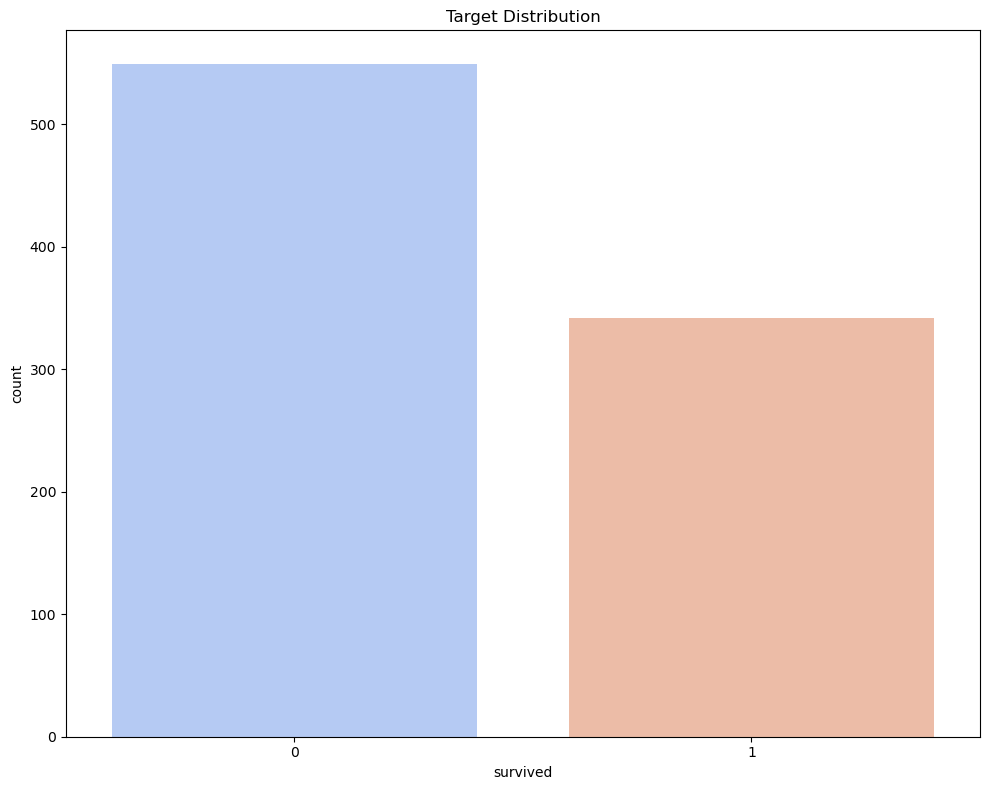

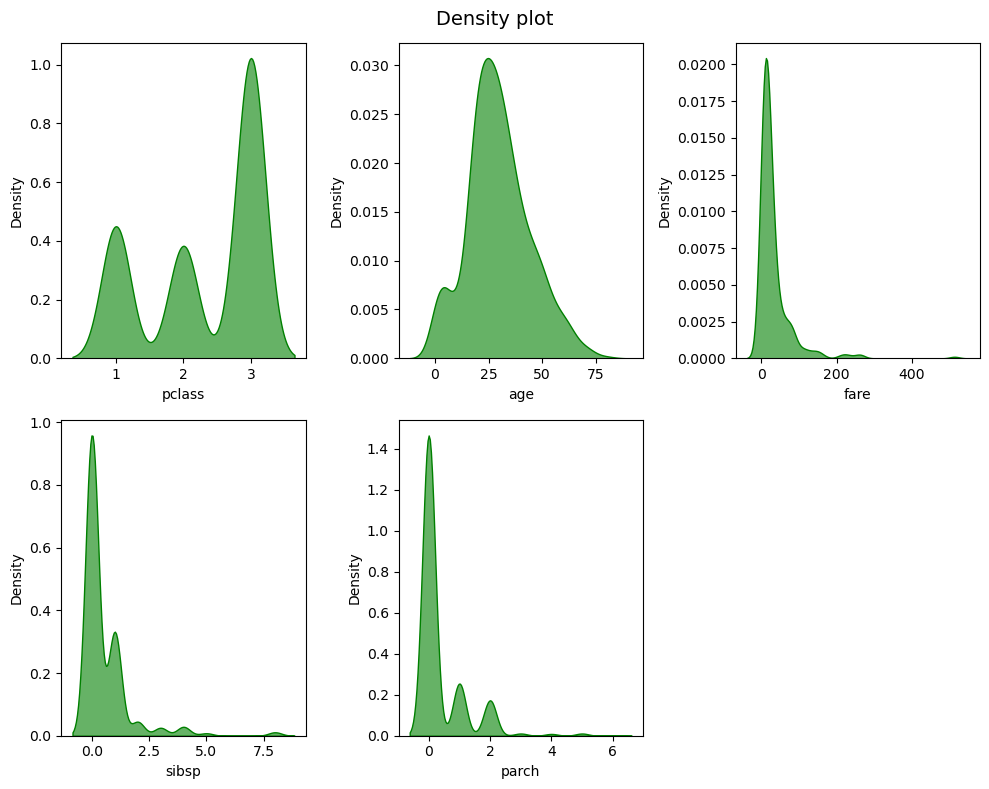

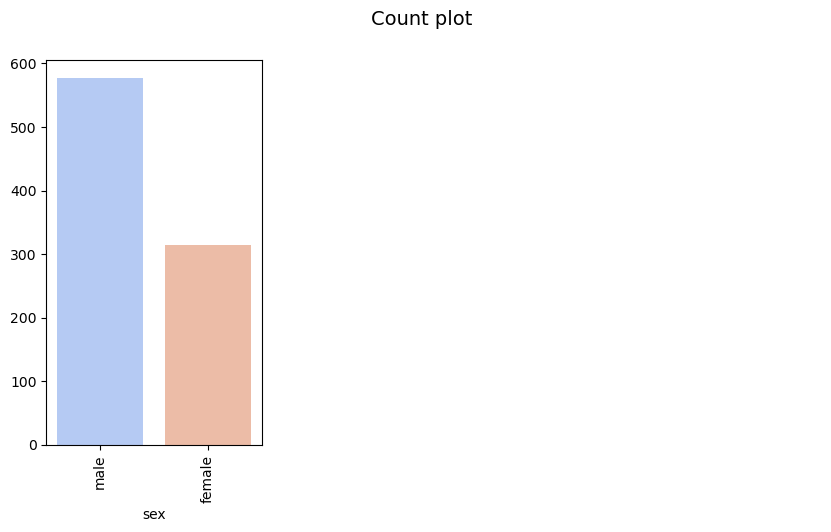

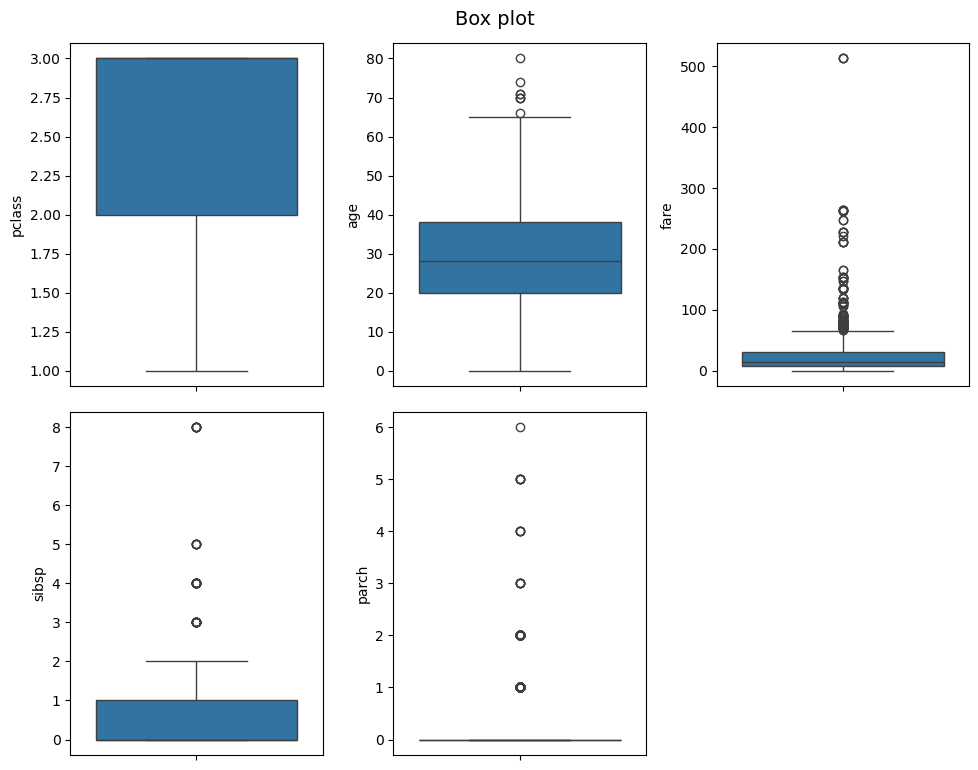

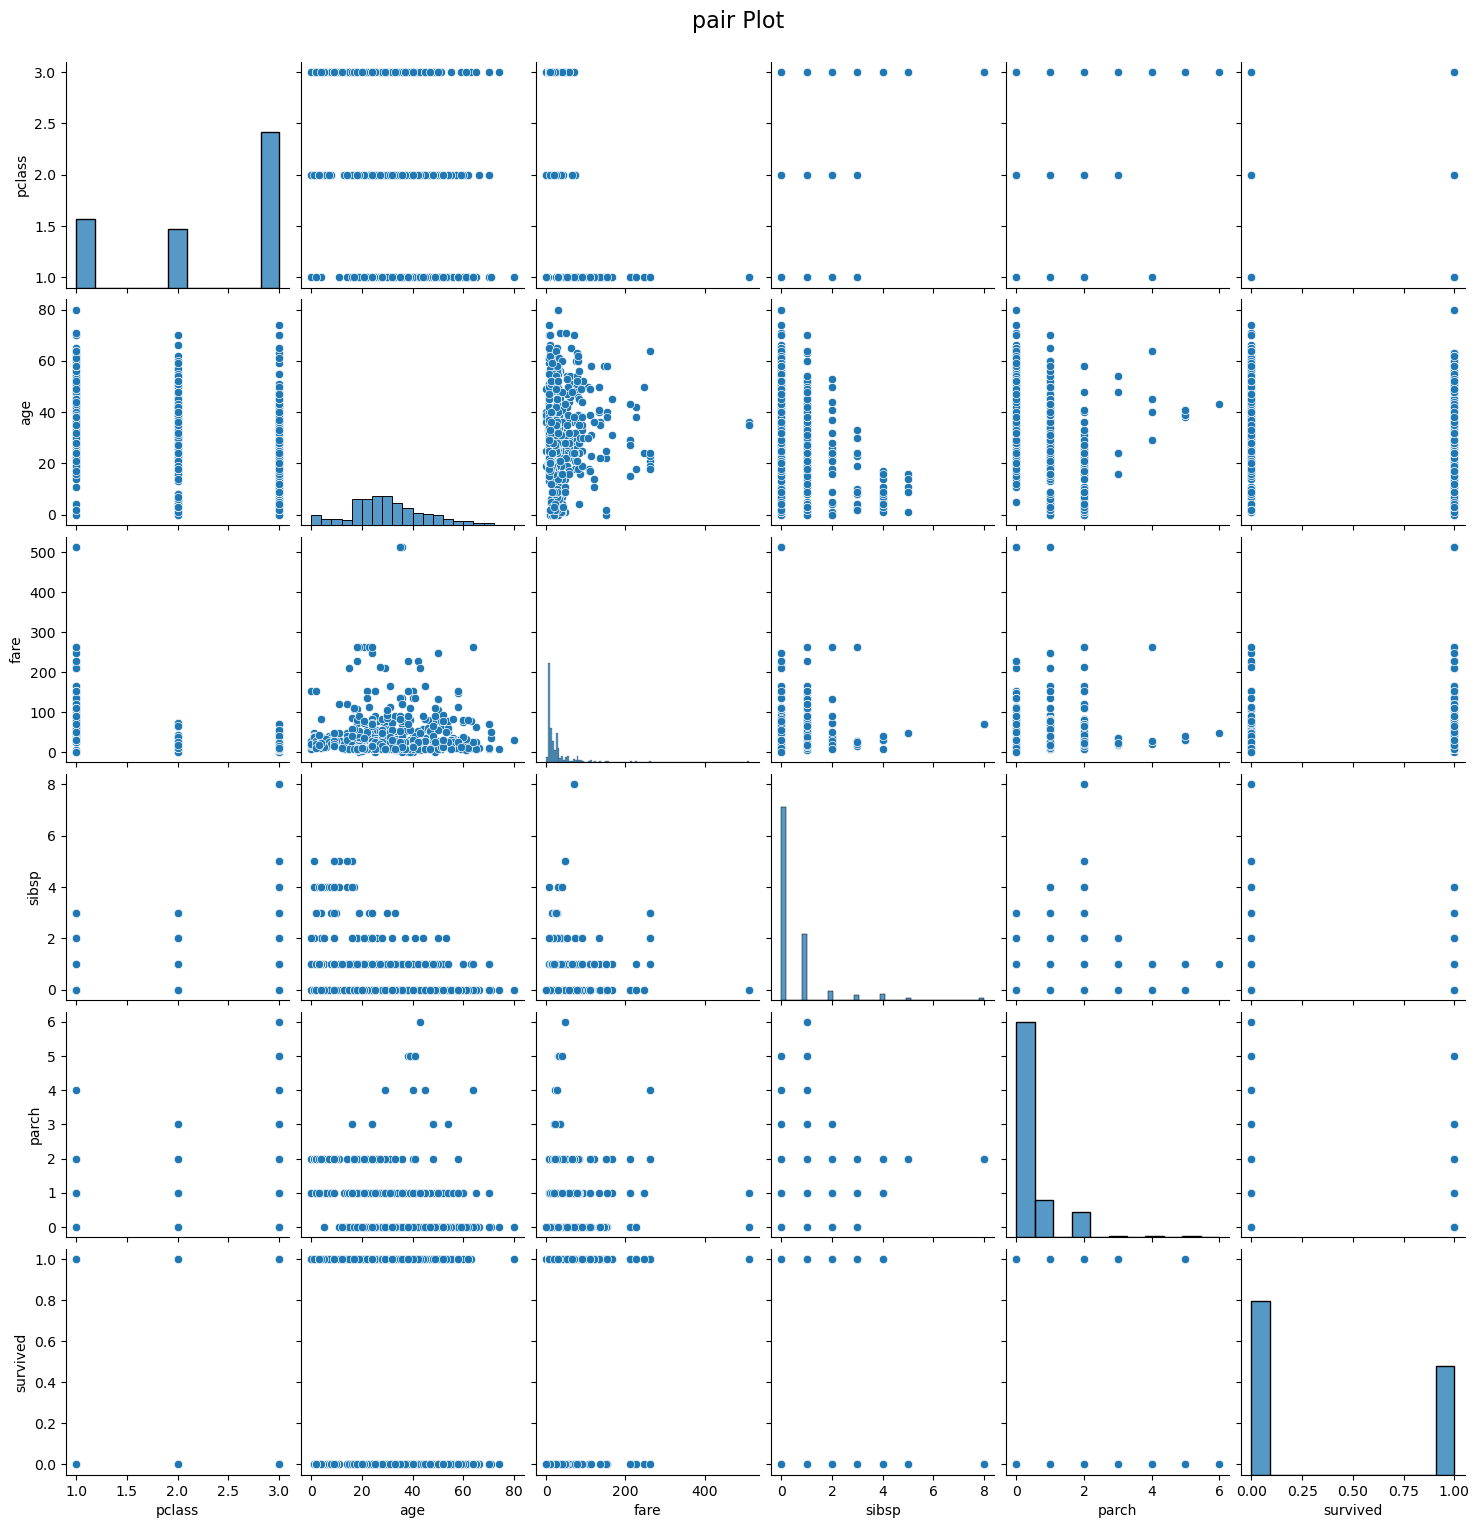

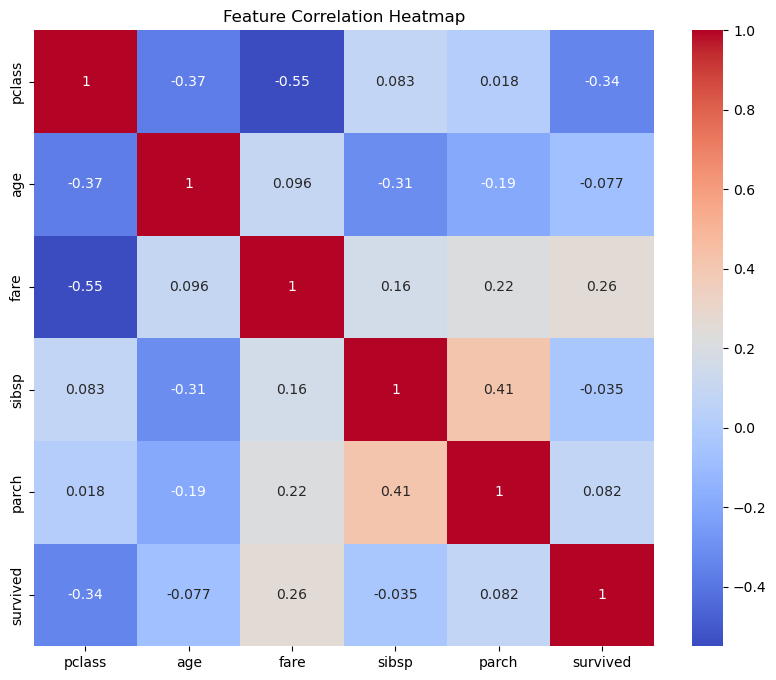

In [13]:
AutoDataPrep.visualize(data=titanic,
                       target_column='survived',
                       plot_type='all',
                       columns=['pclass', 'age', 'fare', 'sex', 'sibsp', 'parch'])

## <b><span style='color:#F1A424'>| 5.</span> Deployed prepared data </b>

In [14]:
adp.deploy(table_name="titanic_prep")

Data deployed successfully to the table:  titanic_prep


In [15]:
remove_context()

True